### 3.2.1 Linear Regression

- Author: Phanxuan Phuc
- Project: https://github.com/phanxuanphucnd/TensorFlow-2.0-Tutorial

In [1]:
import numpy as np
import tensorflow as tf

2021-07-04 01:32:45.311455: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-04 01:32:45.311484: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Parameters:

learning_rate = 0.01
training_steps = 1000
display_step = 50

In [3]:
# Training Data.
# X = np.random.uniform(low=0.5, high=5.0, size=(50,))
# Y = np.random.uniform(low=0.0, high=1.0, size=(50,))

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [4]:
random = np.random

# Weight and Bias, initialized randomly.
W = tf.Variable(random.randn(), name="weight")
b = tf.Variable(random.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

2021-07-04 01:32:51.531665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-04 01:32:51.531701: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-04 01:32:51.531729: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (phucphan-ThinkPad): /proc/driver/nvidia/version does not exist
2021-07-04 01:32:51.532019: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [6]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("Step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

Step: 50, loss: 0.168828, W: 0.300685, b: 0.451059
Step: 100, loss: 0.165598, W: 0.295072, b: 0.490853
Step: 150, loss: 0.163064, W: 0.290101, b: 0.526093
Step: 200, loss: 0.161078, W: 0.285699, b: 0.557301
Step: 250, loss: 0.159520, W: 0.281801, b: 0.584937
Step: 300, loss: 0.158298, W: 0.278349, b: 0.609410
Step: 350, loss: 0.157340, W: 0.275292, b: 0.631084
Step: 400, loss: 0.156589, W: 0.272585, b: 0.650276
Step: 450, loss: 0.155999, W: 0.270187, b: 0.667273
Step: 500, loss: 0.155537, W: 0.268064, b: 0.682324
Step: 550, loss: 0.155175, W: 0.266184, b: 0.695653
Step: 600, loss: 0.154891, W: 0.264519, b: 0.707457
Step: 650, loss: 0.154668, W: 0.263045, b: 0.717910
Step: 700, loss: 0.154493, W: 0.261739, b: 0.727167
Step: 750, loss: 0.154356, W: 0.260583, b: 0.735365
Step: 800, loss: 0.154248, W: 0.259559, b: 0.742624
Step: 850, loss: 0.154164, W: 0.258652, b: 0.749053
Step: 900, loss: 0.154098, W: 0.257849, b: 0.754746
Step: 950, loss: 0.154046, W: 0.257138, b: 0.759787
Step: 1000, l

In [7]:
import matplotlib.pyplot as plt

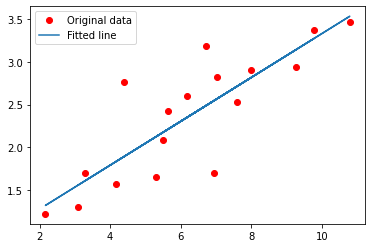

In [8]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()